In [1]:
import os
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import lineid_plot
from ramandecompy import spectrafit
from ramandecompy import peakidentify
from ramandecompy import dataprep
from ramandecompy import datavis
from ramandecompy import dataimport
from ramandecompy import interpspectra
from scipy import interpolate

# Make sure to look at peakidentify and chemical reactions to remove unnecessary additions to your calibration spectra before continuing 

In [2]:
dataprep.new_hdf5('supervised_calibration_dataset')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/water.xlsx', 'water')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx', 'hydrogen')
# dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx', 'methane')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx', 'carbon monoxide')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CO2_100wt%.csv', 'carbon dioxide')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/sapphire.xlsx', 'sapphire')
# dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Propane_test.xlsx', 'propane')
# dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Ethane_test.xlsx', 'ethane')
dataprep.add_calibration('supervised_calibration_dataset.hdf5','../ramandecompy/tests/test_files/FormicAcid_3_6percent.xlsx',label='FormicAcid')
# dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Acetaldehyde_test.xlsx', 'acetaldehyde')

Data from ../ramandecompy/tests/test_files/water.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/CO2_100wt%.csv fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/sapphire.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/FormicAcid_3_6percent.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.


In [3]:
dataprep.view_hdf5('supervised_calibration_dataset.hdf5')

**** supervised_calibration_dataset.hdf5 ****
FormicAcid
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    counts
|    residuals
|    wavenumber
carbon dioxide
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber
carbon monoxide
|    Peak_01
|    counts
|    residuals
|    wavenumber
hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
sapphire
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
water
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber


# Interpolated calibration dataset

In [4]:
# dataprep.new_hdf5('supervised_calibration_interp')

In [5]:
dataprep.view_hdf5('../ramandecompy/tests/test_files/supervised_calibration_interp-Copy2.hdf5')

**** ../ramandecompy/tests/test_files/supervised_calibration_interp-Copy2.hdf5 ****
interp_FormicAcid
|    0
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    1
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    10
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|   

|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    28
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    29
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|   

|    |    residuals
|    |    wavenumber
|    47
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    48
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    49
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |   

|    |    wavenumber
|    10
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    11
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    Peak_23
|    |    counts
|    |    residuals
|    |    wavenumber
|    12
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    P

|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    34
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    35
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    

|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber
|    58
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    59
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|   

|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    24
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    25
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|  

|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber
|    44
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    45
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    46
|    |    Peak_01
|    |    

|    19
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    Peak_23
|    |    Peak_24
|    |    counts
|    |    residuals
|    |    wavenumber
|    2
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    20
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_

|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber
|    45
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    46
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|   

|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    Peak_23
|    |    counts
|    |    residuals
|    |    wavenumber
|    12
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber
|    13
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|   

|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    35
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber
|    36
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    37
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    

|    |    counts
|    |    residuals
|    |    wavenumber
|    57
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    58
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber
|    59
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    

|    |    Peak_23
|    |    counts
|    |    residuals
|    |    wavenumber
|    26
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    27
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    28
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    

|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    Peak_23
|    |    counts
|    |    residuals
|    |    wavenumber
|    54
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    55
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|   

|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    21
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber
|    22
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|   

|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    42
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    43
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    44
|    |    

|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    Peak_23
|    |    Peak_24
|    |    counts
|    |    residuals
|    |    wavenumber
interp_propane
|    0
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    1
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |   

|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    27
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    28
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|   

|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber
|    50
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber
|    51
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|  

|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    24
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    25
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|   

|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    47
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    48
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber


|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    14
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    15
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    16
|    |    

|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    35
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    36
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|   

|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    55
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    56
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|   

In [6]:
hdf5_interpfilename = '../ramandecompy/tests/test_files/supervised_calibration_interp-Copy2.hdf5'
# first a function that will return a normalized interpolated spectra
# target_compound = 'water'
# compound = 'water'
hdf5_calfilename = 'supervised_calibration_dataset.hdf5'
spectra_count = 1

In [7]:
# frames = interpspectra.interpolated_spectra(hdf5_interpfilename, hdf5_calfilename, spectra_count)


In [8]:
# frames

In [9]:
key_list = interpspectra.keyfinder(hdf5_interpfilename)
print(key_list)

['interp_FormicAcid/0', 'interp_FormicAcid/1', 'interp_FormicAcid/10', 'interp_FormicAcid/11', 'interp_FormicAcid/12', 'interp_FormicAcid/13', 'interp_FormicAcid/14', 'interp_FormicAcid/15', 'interp_FormicAcid/16', 'interp_FormicAcid/17', 'interp_FormicAcid/18', 'interp_FormicAcid/19', 'interp_FormicAcid/2', 'interp_FormicAcid/20', 'interp_FormicAcid/21', 'interp_FormicAcid/22', 'interp_FormicAcid/23', 'interp_FormicAcid/24', 'interp_FormicAcid/25', 'interp_FormicAcid/26', 'interp_FormicAcid/27', 'interp_FormicAcid/28', 'interp_FormicAcid/29', 'interp_FormicAcid/3', 'interp_FormicAcid/30', 'interp_FormicAcid/31', 'interp_FormicAcid/32', 'interp_FormicAcid/33', 'interp_FormicAcid/34', 'interp_FormicAcid/35', 'interp_FormicAcid/36', 'interp_FormicAcid/37', 'interp_FormicAcid/38', 'interp_FormicAcid/39', 'interp_FormicAcid/4', 'interp_FormicAcid/40', 'interp_FormicAcid/41', 'interp_FormicAcid/42', 'interp_FormicAcid/43', 'interp_FormicAcid/44', 'interp_FormicAcid/45', 'interp_FormicAcid/4

In [10]:
# df = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
#       keys=None, levels=None, names=None, verify_integrity=False,
#       copy=True,sort=True)
# df

# SAVE your hdf5 file before continuing and MAKE COPIES

In [11]:
hdf5_calfilename = 'supervised_calibration_dataset.hdf5' #update to hdf5_calfilename
hdf5_expfilename = '../ramandecompy/tests/test_files/supervised_calibration_interp-Copy2.hdf5'
frames = []
for i,key in enumerate(key_list):
    df =peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 10, plot =False)
    frames.append(df)

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['hydrogen'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['Unassigne

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['FormicAcid'], ['carbon dioxide'], ['FormicAcid'], ['FormicAcid'], ['carbon monoxide'], ['Unassigned'], ['Unassigned']

(0.8348732835771142, 99.99999999964324, 3194.0, 184.32495927753135, 199.99999999928647, 0.6328088128602138, 125.35478638450279, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

(0.06727993610073957, 4.324860189396222, 2141.0, 4.387789756154966, 8.649720378792445, 0.46621835972201947, 4.387209920519056, "['carbon monoxide']")
(7.337853712707787e-06, 3.1390602832110375, 2899.0, 0.4948060496891902, 6.278120566422075, 0.07404097204123704, 0.4948060381287173, "['Unassigned']")
(0.9999999999999998, 14.775994397361963, 2915.0, 17.82346368571692, 29.551988794723925, 0.3839595863825164, 17.545592489011163, "['Unassigned']")
(0.9999994843619089, 11.363655665436722, 2952.0, 9.53728478570635, 22.727311330873444, 0.26715107080111994, 9.410711247068548, "['Unassigned']")
(0.19502522758581153, 99.99989433133935, 3194.0, 25.421278253605905, 199.9997886626787, 0.11190207166647566, 18.91737882232351, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['Fo

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbo

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['carbon monoxide'], ['U

{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

(0.7065444767219948, 18.124093171914737, 2915.0, 13.146809992337012, 36.248186343829474, 0.26312462219897237, 12.96923223734921, "['Unassigned']")
(0.8918236613238355, 14.613821473729056, 2952.0, 6.660851239656526, 29.22764294745811, 0.15254817852320543, 6.559494372253808, "['Unassigned']")
(0.5002329302184916, 99.40439874076601, 3195.0, 161.12459926335617, 198.80879748153203, 0.6386005901817531, 114.67439834720166, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found 

(0.9923021640579923, 13.611433705183881, 2952.0, 12.93302461609384, 27.222867410367762, 0.303552394153892, 12.729053504465679, "['Unassigned']")
(0.468560821316482, 99.96402580574723, 3194.0, 136.81191696930483, 199.92805161149445, 0.5457672769157405, 98.07071949337907, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.

(0.7791365361541416, 99.99991848989448, 2899.0, 5.324201933262401, 199.99983697978897, 0.0341290613687108, 4.912752122278755, "['Unassigned']")
(1.892797030222937e-11, 23.462460468001325, 2916.0, 17.449204867764006, 46.92492093600265, 0.3493332158982497, 17.449204867755814, "['Unassigned']")
(0.9999999992867112, 13.50902926805488, 2952.0, 16.431607435106073, 27.01805853610976, 0.38717386649152075, 16.172411087890318, "['Unassigned']")
(0.20210286730550636, 99.99996602177396, 3194.0, 35.28838360748207, 199.99993204354791, 0.15495787208233452, 26.235019197664535, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we fo

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['water'], ['FormicAcid'], ['carbon monoxide'

(0.8718895527014077, 4.034658538041234, 1035.0, 1.1825067150784165, 8.069317076082468, 0.09897757340134608, 1.1802213792822742, "['hydrogen']")
(0.1231468642203814, 27.54960710245643, 1098.0, 10.420132377463622, 55.09921420491286, 0.17061011684310984, 10.401634921342636, "['Unassigned']")
(0.9825712277318457, 3.5834204922274484, 1280.0, 4.989496014532298, 7.166840984454897, 0.4468837907041922, 4.981230217734737, "['carbon dioxide']")
(6.69064248448592e-11, 3.1902151084637427, 1385.0, 4.342344361832006, 6.380430216927485, 0.6393550327602647, 4.342344361831589, "['carbon dioxide']")
(0.4274718870966786, 48.73510440540268, 1405.0, 27.60005081881128, 97.47020881080536, 0.22936035052592896, 27.342635466221836, "['FormicAcid']")
(0.0, 8.832216186082167, 1450.0, 2.1390735978594746, 17.664432372164335, 0.11376111257772388, 2.139073597859475, "['Unassigned']")
(2.220446049250313e-16, 40.43466298006215, 1641.0, 11.00835056331224, 80.8693259601243, 0.1278810571670793, 11.00835056331224, "['water'

(4.6629367034256575e-15, 4.337636409437712, 2141.0, 6.150212833738344, 8.675272818875424, 0.6660008657456586, 6.150212833738343, "['carbon monoxide']")
(0.31060877520722774, 30.48794282382393, 2915.0, 17.321241312520826, 60.97588564764786, 0.24014448060881965, 17.148487504400393, "['Unassigned']")
(0.8994250410945668, 99.99782277589857, 3195.0, 77.5644232247295, 199.99564555179714, 0.25871231542952616, 52.05771201685692, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['sapphire'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['carbon dioxide'], ['c

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['Unass

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'],

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['c

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['F

(0.9999999999999858, 21.058470412624292, 2915.0, 36.384029381825215, 42.116940825248584, 0.549963792455394, 35.57608320596154, "['Unassigned']")
(0.6192347421885881, 98.16052093359171, 3195.0, 203.96723380468066, 196.32104186718342, 0.7812075628428229, 143.21487537585298, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

(0.9999999999999993, 99.99999999999991, 1449.0, 2.8400426869337503, 199.99999999999983, 0.031221891951852366, 2.7147519027401423, "['Unassigned']")
(0.9999999999999998, 24.874422115101307, 1716.0, 84.31726181054023, 49.748844230202614, 1.078980564294112, 83.4278487176489, "['FormicAcid']")
(5.843364681012986e-11, 4.007115946946376, 2141.0, 0.7023115653726295, 8.014231893892752, 0.08232575179953451, 0.7023115653725549, "['carbon monoxide']")
(0.27652386260894124, 32.79701900736633, 2916.0, 32.96724294631847, 65.59403801473266, 0.4300711468886057, 32.65166705526259, "['Unassigned']")
(0.999999999999996, 99.99999936267278, 3194.0, 72.56416194882011, 199.99999872534556, 0.2309789027816027, 48.149055132963106, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.

(0.04334985102815958, 4.331455082254182, 2141.0, 7.463308809522744, 8.662910164508364, 0.7980388613198225, 7.4626723741910554, "['carbon monoxide']")
(0.8408885780000279, 4.5865683987109644, 2915.0, 1.9026439865753906, 9.173136797421929, 0.14203793946493407, 1.8948976221204084, "['Unassigned']")
(0.9538940833608534, 23.61246534383136, 2941.0, 11.25719207110945, 47.22493068766272, 0.15508165382072553, 10.970637078290713, "['FormicAcid']")
(0.22954934334266675, 99.99999999991968, 3194.0, 56.1762430320941, 199.99999999983936, 0.24434579304340348, 41.60960392082654, "['water']")
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.

(0.5175802548171424, 99.84842063698257, 3195.0, 200.45356187854216, 199.69684127396513, 0.7856708570513462, 142.1553822092055, "['water']")
{'FormicAcid': 50.0, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'

(0.9999999999600908, 9.581812441026896, 2915.0, 7.865684979293821, 19.163624882053792, 0.2612997599330769, 7.786138758448886, "['Unassigned']")
(0.8042106072652697, 12.68976896940485, 2952.0, 8.449512930498663, 25.3795379388097, 0.2316860766124425, 8.348817376989432, "['Unassigned']")
(0.48666195640321475, 99.99615085448184, 3195.0, 161.84331841222271, 199.99230170896368, 0.6409788503207609, 115.22467171654293, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks t

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydroge

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['car

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['carbon monoxide'], ['Unassi

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['FormicAcid'], ['FormicAcid'], ['carbon monoxide'], ['Unassigned'], 

(0.5705331090164381, 21.625088805400402, 1715.0, 27.65729375644662, 43.250177610800804, 0.49026419893437523, 27.512581064235896, "['FormicAcid']")
(0.1528292016828658, 4.304192715482321, 2141.0, 9.638853617126173, 8.608385430964642, 1.0000735359803539, 9.635974065273077, "['carbon monoxide']")
(0.6009913759879135, 17.609986839210208, 2915.0, 13.690872294009834, 35.219973678420416, 0.29443815997635747, 13.5380273180673, "['Unassigned']")
(0.7966984736881251, 14.095784421491059, 2951.0, 7.67541554499523, 28.191568842982118, 0.19008679294095138, 7.575065246095184, "['Unassigned']")
(0.584497446837274, 99.33880476687904, 3194.0, 111.73140936193127, 198.67760953375807, 0.42877822114979147, 78.9217388056297, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'

(0.9999999999744209, 13.949641205901022, 1715.0, 22.008874101549033, 27.899282411802044, 0.5022094910526544, 21.878666413562986, "['FormicAcid']")
(0.14500274920295364, 4.3061520087389535, 2141.0, 3.48906822514967, 8.612304017477907, 0.3628016337336119, 3.488078814640279, "['carbon monoxide']")
(1.0, 11.556269026091694, 2915.0, 29.15885022208096, 23.11253805218339, 0.8031614939462681, 28.803237761986754, "['Unassigned']")
(0.9999999258755053, 12.247376808742095, 2952.0, 11.778574961448333, 24.49475361748419, 0.3061257154186502, 11.610111180681152, "['Unassigned']")
(0.5479241530804021, 99.99989913541027, 3194.0, 46.50373801517369, 199.99979827082055, 0.17985716731324836, 32.9624444050896, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
The peaks t

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['water'], ['

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['For

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['water'], ['FormicAcid'], ['

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['car

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['F

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['For

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['water'], ['

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'],

(0.13924772717988554, 4.306650866731301, 2141.0, 6.686817308316411, 8.613301733462603, 0.6965836051255159, 6.684996145800194, "['carbon monoxide']")
(0.9999999999628622, 11.335429241132706, 2915.0, 30.078062496239088, 22.670858482265412, 0.8446212707353311, 29.718244915799158, "['Unassigned']")
(0.7802651996014627, 12.303908482892027, 2952.0, 9.97142498418153, 24.607816965784053, 0.284929800475132, 9.859632827714824, "['Unassigned']")
(0.5785362978899947, 99.99868586958632, 3194.0, 205.01138671076964, 199.99737173917265, 0.7834063248833143, 144.6866255268126, "['water']")
{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that 

(0.4910633450345369, 99.9269545244733, 3195.0, 144.19261989878476, 199.8539090489466, 0.5705072707350348, 102.61406783654245, "['water']")
{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 0.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Una

{'FormicAcid': 33.33333333333333, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['FormicAcid'], ['FormicAcid'], ['carbon monoxide'], ['Un

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['For

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['FormicAcid'], ['water

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['F

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['U

(4.111244477078557e-07, 29.011246929159437, 2930.0, 28.302228555490327, 58.022493858318875, 0.4582389222483958, 28.302228185638278, "['Unassigned']")
(0.9999998644307617, 99.99999999999997, 2951.0, 32.120334935500395, 199.99999999999994, 0.10224220816818229, 28.492591887218726, "['Unassigned']")
(0.08430524074713791, 99.80850013676381, 3195.0, 165.252856895696, 199.61700027352762, 0.7565785319143189, 124.29000351277965, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Una

(0.16227537042116674, 4.302076011450298, 2141.0, 7.978796890768136, 8.604152022900596, 0.8255900816731808, 7.976267187592575, "['carbon monoxide']")
(0.9653515422779559, 99.99706873146404, 2899.0, 5.280433149430011, 199.99413746292808, 0.026927049291953734, 4.774868193199803, "['Unassigned']")
(0.1101015167383656, 20.444669548728083, 2915.0, 15.227744749122166, 40.889339097456165, 0.3374426740439179, 15.191596933885377, "['Unassigned']")
(0.9993811897276828, 12.272696741703122, 2952.0, 9.53416782812744, 24.545393483406244, 0.24735502128730258, 9.397607726431959, "['Unassigned']")
(0.3075815059758902, 99.99999999999906, 3194.0, 9.786221238329642, 199.99999999999812, 0.041410209920061974, 7.172152036384735, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 125.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 

(0.4637015187333636, 19.328463792750753, 2915.0, 20.072167911470615, 38.656927585501506, 0.4148821816233617, 19.88243072344621, "['Unassigned']")
(0.9970238664832096, 12.49932568172303, 2952.0, 12.8886174830532, 24.99865136344606, 0.3286883023119505, 12.701048778192193, "['Unassigned']")
(0.38377872786760636, 99.99999999999996, 3194.0, 11.262988219116787, 199.99999999999991, 0.0463597187876261, 8.16850027851085, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['FormicAcid'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['Unassigned'], ['FormicAcid'], ['carbon monoxide'], ['Unassigned'], ['water']]
(0.13804781

(0.2838604338713577, 29.328910029584595, 2916.0, 23.163166648003887, 58.65782005916919, 0.3370272686108943, 22.959512911227137, "['Unassigned']")
(0.8798837830239459, 98.68095873342396, 3195.0, 137.1044731073178, 197.36191746684793, 0.46751856111252577, 92.5736004219369, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'],

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['FormicAcid'], ['FormicAcid'], ['water'], ['FormicAcid'], ['Unassigned'], ['water']]
(0.38083678404508875, 3.656621452104486, 379.0, 0.19494963707008162, 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Una

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

(0.9999999870087545, 20.538021351195646, 2915.0, 24.314788183974798, 41.07604270239129, 0.3768443597805651, 23.78816750286783, "['Unassigned']")
(0.6695639075026659, 99.47054291688909, 3194.0, 146.62777380901926, 198.94108583377817, 0.5429646843758776, 102.28185254704809, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['FormicAcid'], ['water']

(0.999999999999807, 8.423508371336057, 2952.0, 5.142389076123097, 16.847016742672114, 0.19432203416615546, 5.091790209234622, "['Unassigned']")
(0.4910667478180917, 99.99999943994045, 3194.0, 14.445864331876079, 199.9999988798809, 0.05711415696652218, 10.321668581451233, "['water']")
{'FormicAcid': 50.0, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.

(0.7141488397906517, 92.96280805132777, 3195.0, 208.8203031698897, 185.92561610265554, 0.812232203762473, 146.61385203391626, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks 

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sa

{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['FormicAcid'],

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['FormicAcid'], ['carbon dioxide'], ['carbon diox

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['water']]
(0.7254161004023361, 4.3805

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['For

(1.0, 27.786600928023315, 1401.0, 52.590599459849855, 55.57320185604663, 0.6024525191751473, 51.935327660582715, "['FormicAcid']")
(1.6914802891676572e-12, 8.876205815881354, 1449.0, 2.7626120250300836, 17.75241163176271, 0.14619426231939406, 2.762612025030066, "['Unassigned']")
(0.0, 43.07901889860331, 1646.0, 60.08306926675869, 86.15803779720662, 0.6551248906195082, 60.0830692667587, "['water']")
(0.5855553790709213, 21.32429264191893, 1715.0, 54.389300477688124, 42.64858528383786, 0.971924862783967, 54.101285480662625, "['FormicAcid']")
(0.9999999999223227, 20.89686730048586, 2915.0, 40.115995293454205, 41.79373460097172, 0.6110637404575856, 39.231997686831285, "['Unassigned']")
(0.7829803167712415, 99.15697127328943, 3194.0, 150.85990586818272, 198.31394254657886, 0.5342766736950999, 103.59409304202438, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for Form

(0.9999971668690313, 11.456912556348616, 2952.0, 8.120879044210348, 22.913825112697232, 0.2256244476948127, 8.01221978956586, "['Unassigned']")
(0.5434599042085922, 99.28373920893569, 3195.0, 193.95262805825666, 198.56747841787137, 0.756859616184584, 137.24958930796987, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 75.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we foun

(0.9999999999999927, 34.669811211375524, 1401.0, 36.70264365305815, 69.33962242275105, 0.33697369312515774, 36.13209747066124, "['FormicAcid']")
(0.9999999999999998, 99.99999999999994, 1450.0, 5.64283153427219, 199.9999999999999, 0.021751494819584917, 5.393962699534048, "['Unassigned']")
(1.0, 29.864369383653155, 1715.0, 49.81532871587843, 59.72873876730631, 0.5309575236649351, 49.184448025449925, "['FormicAcid']")
(2.248201624865942e-14, 4.3329879668718725, 2141.0, 4.40022784037905, 8.665975933743745, 0.4770077945783439, 4.400227840379049, "['carbon monoxide']")
(0.9999999999999991, 9.21102838136791, 2899.0, 6.3172802132429755, 18.42205676273582, 0.21830925521150743, 6.258268906265227, "['Unassigned']")
(0.20917308144642144, 21.338957971471626, 2930.0, 13.073383974655428, 42.67791594294325, 0.2683715747446205, 13.009380267611402, "['Unassigned']")
(0.9999999999999998, 7.309212523495556, 2952.0, 5.775446433174276, 14.618425046991112, 0.25151569897506504, 5.7261331552533195, "['Unassign

(0.0, 41.42786497492622, 1643.0, 29.997903074625075, 82.85572994985245, 0.3401231085427408, 29.99790307462507, "['water']")
(0.9849941153714961, 14.985540514657254, 1715.0, 25.653478031519004, 29.971081029314508, 0.5487984192548436, 25.49288520698682, "['FormicAcid']")
(0.0953509073386431, 4.317485026406022, 2141.0, 4.970112410398571, 8.634970052812044, 0.5241016705366291, 4.96918318015269, "['carbon monoxide']")
(0.7933126334829976, 25.1878195673194, 2915.0, 30.883352100742428, 50.3756391346388, 0.4286575271806013, 30.232934091951897, "['Unassigned']")
(0.8051569930311376, 99.9936345167714, 3194.0, 80.70041875395582, 199.9872690335428, 0.28070265865841715, 55.123353354896935, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.]
The peaks that 

(0.9999997467678716, 8.399858139366403, 2915.0, 19.85889692221389, 16.799716278732806, 0.7525465163324115, 19.682826689673004, "['Unassigned']")
(0.963324516606697, 99.57990013040734, 3195.0, 156.99241674423033, 199.15980026081468, 0.5105851224553378, 104.47586668936866, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The pe

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['For

{'FormicAcid': 16.666666666666664, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen']

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'],

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAci

(0.9865982385039724, 3.545096260037092, 1280.0, 4.155624312532672, 7.090192520074184, 0.37550705663041156, 4.148785654637466, "['carbon dioxide']")
(1.0, 3.6937177937766936, 1386.0, 6.467789714645405, 7.387435587553387, 0.557368354290126, 6.457021013427919, "['carbon dioxide']")
(1.0, 23.870304709336466, 1400.0, 41.3000851359039, 47.74060941867293, 0.5507355502608441, 40.857856030520956, "['FormicAcid']")
(0.9018796197780689, 25.725774872679523, 1716.0, 76.54468333170179, 51.451549745359046, 0.9913053796299491, 75.79156482391896, "['FormicAcid']")
(0.5996149282630953, 29.275040387920402, 2915.0, 23.46365687944787, 58.550080775840804, 0.30371002236344635, 23.02979397010292, "['Unassigned']")
(0.9999999999999998, 99.12135379015135, 3194.0, 44.12121036114354, 198.2427075803027, 0.14168710284243632, 29.33548534246946, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 75.0, 'sapphire': 25.0, 'water': 50.0}
The peaks that we found for

(0.6491801245186151, 20.928398968595836, 1715.0, 33.38144283413174, 41.85679793719167, 0.5924376757555176, 33.189104246908364, "['FormicAcid']")
(0.9999999999999974, 9.770133179630886, 2915.0, 20.247273104401057, 19.54026635926177, 0.6596539759386905, 20.0384885778606, "['Unassigned']")
(0.8446892394547341, 16.13735070088777, 2951.0, 11.292090800974387, 32.27470140177554, 0.2391918189297283, 11.112927000162761, "['Unassigned']")
(0.6489830167567777, 95.4585957888777, 3195.0, 147.6091758761848, 190.9171915777554, 0.5743898792066884, 103.93532258613249, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 50.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we fo

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['h

(0.9996984086358776, 11.107015078544947, 2952.0, 11.692463076228595, 22.214030157089894, 0.3351359914714766, 11.540834563103706, "['Unassigned']")
(0.501225618399319, 99.99563020700272, 3195.0, 171.74460348703263, 199.99126041400544, 0.6764090855973625, 122.02687154727899, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

(0.8734822482977358, 97.69528188321024, 3195.0, 190.87365701110247, 195.39056376642048, 0.6593289515765058, 129.30918504486203, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['F

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['car

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'],

(0.9761201746214865, 24.506341606722938, 2931.0, 25.59636860207759, 49.012683213445875, 0.33624454895630923, 24.923248256005866, "['FormicAcid']")
(0.833350236058786, 5.962276909913783, 2952.0, 2.913567077806281, 11.924553819827565, 0.16787764529234128, 2.8966549669501034, "['Unassigned']")
(0.4084357116432423, 99.99999999995609, 3194.0, 110.63264720343696, 199.99999999991218, 0.4512461153637626, 79.96331176413273, "['water']")
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 0.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found fo

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 0.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbo

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['hydrogen'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['FormicAcid'], ['carbon monoxide'], ['Unassigned'], ['wat

(0.5314410832723448, 99.75077340597488, 3195.0, 146.0239266507172, 199.50154681194977, 0.569823846988243, 103.3815521910915, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peak

(0.22149757578603924, 17.246010864312204, 929.0, 2.4722391530355035, 34.49202172862441, 0.06252727929726411, 2.4665140330995277, "['Unassigned']")
(0.7214070227076537, 3.6404167747779472, 993.0, 5.37639668716068, 7.2808335495558945, 0.5323962499709779, 5.368352657478933, "['Unassigned']")
(0.9999996017105979, 5.3437210880070385, 1035.0, 2.0841531451131226, 10.687442176014077, 0.12414695025592823, 2.0780345860338416, "['hydrogen']")
(0.00012720099076307667, 30.172228552561368, 1098.0, 5.292602701478199, 60.344457105122736, 0.08239140185399199, 5.292592073664298, "['Unassigned']")
(0.6955947953002927, 29.955374050180165, 1220.0, 12.585624363987696, 59.91074810036033, 0.15310091608896254, 12.458489704575339, "['FormicAcid']")
(0.7132504920321612, 3.4773027675636734, 1280.0, 3.3125373067811887, 6.954605535127347, 0.3445865516460255, 3.3086717542140858, "['carbon dioxide']")
(0.7975040453460431, 3.272065957052693, 1386.0, 5.2020017488671835, 6.544131914105386, 0.5547993877434958, 5.19588291

(0.9999999442777632, 12.068362363984464, 2952.0, 5.769805993217122, 24.13672472796893, 0.15218190192592376, 5.688488038924305, "['Unassigned']")
(0.6275790706002023, 98.64784065266305, 3194.0, 130.62763077712216, 197.2956813053261, 0.4961676726767955, 91.86594308636757, "['water']")
{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The pea

(0.13485467453808508, 4.308640257256677, 2141.0, 4.908239784589131, 8.617280514513354, 0.5118260674645932, 4.906944594614621, "['carbon monoxide']")
(1.717866904282772e-08, 3.124642510393053, 2899.0, 0.6100952996393165, 6.249285020786106, 0.09171389414317259, 0.6100952996060997, "['Unassigned']")
(1.0, 13.737041620153024, 2915.0, 22.54773911401452, 27.474083240306047, 0.5224682627847943, 22.220907665702903, "['Unassigned']")
(0.999999995773631, 12.018499570072509, 2952.0, 12.084426930255827, 24.036999140145017, 0.3200559725506399, 11.914815572868113, "['Unassigned']")
(0.41035352309211487, 99.99999986632928, 3194.0, 95.13808348927519, 199.99999973265855, 0.3877709594515111, 68.74584355805383, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['FormicAcid'], ['carbon monoxide'], ['Unassigned'], ['Unassign

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['For

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['carbon dioxide'], ['FormicAcid'], ['water'], ['FormicAcid'], ['carb

(0.9565053061936519, 97.63932301466544, 3194.0, 142.00962570361193, 195.27864602933087, 0.47253778032194915, 95.37650476279465, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The pe

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['FormicAcid'], ['carbon dioxide'],

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['F

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['c

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['FormicAcid'], ['carbo

(0.6266646706095673, 26.343890395228367, 2916.0, 32.2797544711511, 52.687780790456735, 0.45929503324062426, 31.716734261581806, "['Unassigned']")
(0.8824084730359825, 96.67121966122237, 3195.0, 153.97802435228212, 193.34243932244473, 0.5353631809221262, 104.43706220895574, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The pe

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 0.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['FormicAcid'], ['FormicAcid'], [

(0.9266568170573306, 16.86005856690945, 1715.0, 35.988505538505635, 33.7201171338189, 0.7031495298143392, 35.750047587138255, "['FormicAcid']")
(0.025358034517880712, 4.332978412386022, 2141.0, 4.012183620230107, 8.665956824772044, 0.4313875494692519, 4.011983410878721, "['carbon monoxide']")
(1.0, 11.56757367872119, 2915.0, 33.88721106019652, 23.13514735744238, 0.932488920775106, 33.47352894791213, "['Unassigned']")
(1.0, 99.99999984693541, 3194.0, 88.2759252822521, 199.99999969387082, 0.2809909977237225, 58.57440194240165, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon mon

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['carbon dioxid

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['carbon dioxide'], ['carbon diox

(0.9999948740062741, 11.212747126547768, 2952.0, 9.403932361397414, 22.425494253095536, 0.26696151303833715, 9.280785184869393, "['Unassigned']")
(0.5030477569856512, 99.99999709710413, 3194.0, 88.21122992012688, 199.99999419420826, 0.3471577803545861, 62.92168232823472, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 0.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peak

{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 0.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 0.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['

(0.9915638858804903, 97.20393789819094, 3194.0, 158.70730907215102, 194.4078757963819, 0.5217980224997933, 106.13393980287798, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 0.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

(0.7245780590368489, 98.94498313295706, 3194.0, 155.0233806387498, 197.88996626591413, 0.5640523475511701, 107.42220537005458, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 0.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

(1.0, 13.595845909299046, 2915.0, 36.71656836519017, 27.19169181859809, 0.8596189435619757, 36.189823598327884, "['Unassigned']")
(0.9792490673328971, 97.4103711462446, 3194.0, 158.4635834732479, 194.8207422924892, 0.522925814260124, 106.11806853704122, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 0.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['FormicAcid'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['water'], ['FormicAcid'], ['carbon monoxide'], ['Unassigned'], ['water']]
(0.696994761896484

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['FormicAcid'], ['carbon dioxid

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['FormicAcid'], ['carbon monoxi

{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['For

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAci

(0.7588417825122253, 17.449184341731677, 2915.0, 32.531528534180694, 34.89836868346335, 0.6615177963851643, 32.07713737620264, "['Unassigned']")
(0.9999990816113987, 12.83094495596401, 2952.0, 15.842830534373118, 25.66188991192802, 0.39302886923069463, 15.605452232458852, "['Unassigned']")
(0.407892997806695, 99.99999999875465, 3194.0, 84.86160789746239, 199.9999999975093, 0.3462014742448771, 61.341074852002166, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 0.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'

(0.9999935436490612, 10.710494017115202, 2952.0, 11.714073325442742, 21.420988034230405, 0.3481367705431059, 11.567540335110467, "['Unassigned']")
(0.5620943190268588, 99.9971988389526, 3194.0, 79.4076151838752, 199.9943976779052, 0.3054202799129455, 56.17283529868887, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 0.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

(0.9928777439039598, 11.621445400904763, 2952.0, 7.213612195266048, 23.242890801809526, 0.1982492671237359, 7.116404501336458, "['Unassigned']")
(0.5631848053348382, 99.99995689403436, 3194.0, 59.50512202148714, 199.9999137880687, 0.22876607054927886, 42.087041388218566, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 0.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['c

(1.0, 7.4482739923395735, 2915.0, 22.364305790484707, 14.896547984679147, 0.9557623199777862, 22.188478284697876, "['Unassigned']")
(0.9999999999997318, 11.31676316299054, 2952.0, 12.0504690547684, 22.63352632598108, 0.3389470450198478, 11.891201241848947, "['Unassigned']")
(0.9999997598741044, 98.10899551050092, 3194.0, 14.28541641339394, 196.21799102100184, 0.0463483472473835, 9.520590949553513, "['water']")
{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
5

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

(1.0, 91.84880884319368, 3194.0, 126.07888377757028, 183.69761768638736, 0.4369371323468361, 85.31448799774442, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['FormicAcid'

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'

(0.6199692476712312, 99.00713238287452, 3194.0, 130.6109854980621, 198.01426476574903, 0.49582409418669593, 91.86951708608697, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 0.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.

(0.5332101148265594, 22.076695987438583, 1715.0, 32.96564848367481, 44.15339197487717, 0.5808466290623919, 32.801078358981826, "['FormicAcid']")
(0.1315933815459137, 4.3090732025617875, 2141.0, 6.73596554163323, 8.618146405123575, 0.7031206997886028, 6.734230862165224, "['carbon monoxide']")
(9.912549694135464e-05, 2.867431897857418, 2899.0, 0.395328038930008, 5.734863795714836, 0.06475725383874127, 0.39532792495597485, "['Unassigned']")
(0.34736717927438265, 21.246528702920248, 2915.0, 15.845700010450173, 42.493057405840496, 0.31109199799313464, 15.722382659699552, "['Unassigned']")
(0.9999117324099303, 9.957869256929316, 2952.0, 9.442202106137408, 19.91573851385863, 0.30183891657474576, 9.332391519010121, "['Unassigned']")
(0.5832808908756514, 99.66787606898768, 3195.0, 182.39458508802417, 199.33575213797536, 0.6979798732744147, 128.22233050889702, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'w

(0.9999999999999993, 12.881200230908894, 2915.0, 10.047218193691636, 25.762400461817787, 0.2482787956376669, 9.910648257820275, "['Unassigned']")
(1.0, 8.297407312407081, 2952.0, 6.4035026703013145, 16.594814624814163, 0.24565483281908454, 6.3414378012643775, "['Unassigned']")
(0.5256878893499378, 99.99990706597819, 3194.0, 53.21139584090179, 199.99981413195638, 0.2075910931961391, 37.83541592303447, "['water']")
{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
8

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'],

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 0.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['Unassigned'],

(0.537804126497114, 99.97568838484875, 3194.0, 140.41811460392404, 199.9513767696975, 0.5453626272303371, 99.67873567354277, "['water']")
{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['FormicAcid'], ['carbon dioxide'], ['carbon diox

(0.06606326781409788, 99.99999978314752, 3194.0, 68.9514812776955, 199.99999956629503, 0.31698104913261493, 52.20113136576717, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.

(0.539808430475049, 99.3000213449876, 3194.0, 111.50695694180068, 198.6000426899752, 0.43568208714433737, 79.27258070654729, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['For

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['For

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['ca

(1.0, 13.156760170309333, 2915.0, 27.60044452815551, 26.313520340618666, 0.6677551496458303, 27.217258203721265, "['Unassigned']")
(0.7434836836643353, 14.573839249543786, 2952.0, 10.214718895235915, 29.147678499087572, 0.25032344122159184, 10.085491632057725, "['Unassigned']")
(0.524223502687922, 99.99999999997245, 3194.0, 59.12946072627922, 199.9999999999449, 0.23080984689175293, 42.052056683014264, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.00

(0.5799505494589445, 97.28839524846947, 3195.0, 119.15358913756734, 194.57679049693894, 0.46774164469049495, 84.32510046851039, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we fo

(3.2925261990168764e-06, 2.775328093021426, 2899.0, 0.40130497111863406, 5.550656186042852, 0.06791997869177527, 0.4013049673991332, "['Unassigned']")
(0.40993489829848484, 20.18385233736534, 2915.0, 18.8791559084558, 40.36770467473068, 0.3813001061760243, 18.714420730928794, "['Unassigned']")
(0.9999989921938826, 11.676134419299254, 2952.0, 13.812710798703888, 23.35226883859851, 0.37655651708227633, 13.624359903636519, "['Unassigned']")
(0.4153733904874282, 99.99999999992649, 3194.0, 47.21976677903582, 199.99999999985297, 0.19210298356497765, 34.096800100448135, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The pe

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['F

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['c

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['FormicAcid'], ['FormicAcid'], ['carbo

(2.7755575615628914e-16, 41.657392300447455, 1644.0, 50.18908790972859, 83.31478460089491, 0.5659199671726277, 50.189087909728606, "['water']")
(0.7041278295529159, 19.909953923232443, 1715.0, 44.84203752095725, 39.819907846464886, 0.8178060690495739, 44.575431547376965, "['FormicAcid']")
(4.091376998749396e-06, 4.331470894393346, 2141.0, 1.3568214026254135, 8.662941788786693, 0.14713788412992326, 1.356821391705253, "['carbon monoxide']")
(1.2807543444681713e-06, 4.48331374583902, 2899.0, 0.9020757335088729, 8.96662749167804, 0.09451080946528533, 0.9020757282551127, "['Unassigned']")
(0.01507329168319671, 27.096381565168286, 2931.0, 21.34342738091421, 54.19276313033657, 0.36819289211903033, 21.333847670818255, "['FormicAcid']")
(0.9996215132182695, 99.99999999999973, 2951.0, 27.557610749210564, 199.99999999999946, 0.08773439163354306, 24.446367849356616, "['Unassigned']")
(0.04696553080482668, 95.74282347980072, 3194.0, 92.14316331597453, 191.48564695960144, 0.4452149039399732, 70.8184

{'FormicAcid': 83.33333333333334, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 25.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'],

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 0.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'

(0.008060416507041868, 99.99999608277543, 3194.0, 37.66271631743412, 199.99999216555085, 0.17644916311674974, 28.73211116425419, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The p

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydroge

(0.7821298249212674, 27.719341436569007, 2937.0, 18.881299333147226, 55.43868287313801, 0.23928960231867402, 18.424074934954586, "['FormicAcid']")
(0.4588689151480353, 96.71255738698113, 3194.0, 105.00381455628111, 193.42511477396226, 0.43455497538168747, 76.03509945572078, "['water']")
{'FormicAcid': 100.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0

(0.15925918858883736, 4.303212365778474, 2141.0, 4.5145992423871, 8.606424731556949, 0.46749489662468097, 4.513194107718997, "['carbon monoxide']")
(0.9229287168921478, 16.098271252848434, 2915.0, 18.62909329480018, 32.19654250569687, 0.38185543846403874, 18.33708951166494, "['Unassigned']")
(0.9999999999999678, 12.589200167460735, 2952.0, 8.014970930819656, 25.17840033492147, 0.20265342125148095, 7.897140137826306, "['Unassigned']")
(0.4529545520434025, 99.99466073396891, 3195.0, 104.61377591673904, 199.98932146793783, 0.4196673412356018, 74.82879206908626, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.

(0.07916351540951888, 32.58178598120839, 2916.0, 26.090802981622275, 65.16357196241678, 0.3665425472895695, 26.01977045984849, "['Unassigned']")
(0.9999999999903288, 100.0, 3194.0, 101.71619760024257, 200.0, 0.32377271281330117, 67.49252892172802, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.

(0.5028873983022409, 22.50439980402998, 1715.0, 66.98716641713543, 45.00879960805996, 1.171531520350431, 66.66566307923223, "['FormicAcid']")
(3.154210226341547e-11, 4.31127118209428, 2141.0, 3.4811273818878075, 8.62254236418856, 0.3792733855384231, 3.481127381887593, "['carbon monoxide']")
(0.3624341189392175, 27.64905899468734, 2916.0, 31.61029159737354, 55.29811798937468, 0.4742767681175425, 31.275682222361816, "['Unassigned']")
(0.8846849614567884, 95.6026410127496, 3194.0, 226.30133541517404, 191.2052820254992, 0.7948013396380813, 154.41749362362347, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks tha

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0

(1.0, 6.6962715596236, 2915.0, 19.536852764687673, 13.3925431192472, 0.9286919331967428, 19.398758626747824, "['Unassigned']")
(1.0, 100.0, 3194.0, 36.08639186436678, 200.0, 0.1148665528713026, 23.944680434822143, "['water']")
{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 125.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['FormicAcid'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

(0.912000737685836, 16.41487225837025, 2951.0, 12.43128946111236, 32.8297445167405, 0.25115243124783754, 12.214677278828301, "['Unassigned']")
(0.5853816469863973, 98.57852594376678, 3195.0, 158.7111834750683, 197.15705188753356, 0.6135487012937815, 111.85441319870888, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 

{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['sapphire'], ['hyd

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['F

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], [

(0.20825440708283993, 17.74361085461453, 2951.0, 9.997413110238682, 35.48722170922906, 0.2468909787581922, 9.95442047840136, "['Unassigned']")
(0.9181603246937484, 99.99999999999952, 3194.0, 22.988133937989147, 199.99999999999903, 0.07602201855664474, 15.441907295495701, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['For

(0.8921658934190538, 97.89367782291178, 3194.0, 204.20834936175095, 195.78735564582357, 0.6980599087130607, 138.4025266409654, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0

(0.000207172272336964, 40.85149083706928, 1641.0, 42.73998342207589, 81.70298167413856, 0.49140008828888154, 42.7398292890907, "['water']")
(0.9999998096893814, 10.696815262696564, 1715.0, 14.559215829956363, 21.393630525393128, 0.4332450958033767, 14.49316575396579, "['FormicAcid']")
(0.14735344486453794, 4.305135102628331, 2141.0, 6.557628205997404, 8.610270205256661, 0.6814967473866164, 6.555738930319572, "['carbon monoxide']")
(1.0, 8.683432867067912, 2915.0, 29.8041705680555, 17.366865734135825, 1.092535899862774, 29.531007439714184, "['Unassigned']")
(0.8829295970669269, 15.745357187874733, 2951.0, 12.98583084379496, 31.490714375749466, 0.27714191677610617, 12.775688961523317, "['Unassigned']")
(0.6202973808198667, 99.8292620647684, 3194.0, 104.85259204866126, 199.6585241295368, 0.39471015625927275, 73.59285769416346, "['water']")
{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks tha

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'],

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicA

(0.015697003905627005, 4.335499144127417, 2141.0, 2.7158466966052544, 8.670998288254834, 0.2927527185027592, 2.715762757842268, "['carbon monoxide']")
(6.867577906355393e-07, 2.6597576993060636, 2899.0, 0.30676625033042026, 5.319515398612127, 0.05417553405084332, 0.3067662497620767, "['Unassigned']")
(0.0015985713852630923, 22.764141244828732, 2916.0, 14.560549906803544, 45.528282489657464, 0.30028971507754443, 14.559989845387678, "['Unassigned']")
(0.999999859796864, 12.749630951058796, 2952.0, 13.628424094161012, 25.499261902117592, 0.3402500376860327, 13.425517509802027, "['Unassigned']")
(0.5798918346037996, 99.99999999844697, 3194.0, 183.4569548927552, 199.99999999689393, 0.7006550223760348, 129.449259459283, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 50.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1

(9.671019540746784e-11, 41.5394448479616, 1643.0, 70.05190592020153, 83.0788896959232, 0.7921310949654636, 70.05190592008165, "['water']")
(0.691790055271546, 19.936893810181527, 1715.0, 46.10481848097556, 39.87378762036305, 0.8440197629542054, 45.835143391482625, "['FormicAcid']")
(0.07589091121790936, 4.321646531422008, 2141.0, 5.431131069787402, 8.643293062844016, 0.5758677403527919, 5.430322102897429, "['carbon monoxide']")
(1.0, 10.359686830747995, 2915.0, 31.903340571318992, 20.71937366149599, 0.9802563409540859, 31.554520975249226, "['Unassigned']")
(0.21661025472553053, 16.860794300376227, 2951.0, 12.306988486289912, 33.721588600752455, 0.3189169692483931, 12.254673998926831, "['Unassigned']")
(0.6511439771384595, 99.99841108319072, 3194.0, 173.2040769510546, 199.99682216638143, 0.6428220572056285, 120.97924594050936, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks t

(0.11973012569268787, 4.311741796534433, 2141.0, 7.4392199560347585, 8.623483593068865, 0.7791470009970574, 7.4374758011679925, "['carbon monoxide']")
(0.4109407801946128, 28.722820982459567, 2915.0, 23.157559455067563, 57.44564196491913, 0.3285427031316642, 22.86960658196657, "['Unassigned']")
(0.9955417964342542, 99.86383740182619, 3194.0, 79.14439854128901, 199.72767480365238, 0.25280290134662253, 52.56708900547857, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The

(0.48665283788579944, 21.19012760750222, 2916.0, 22.35175539291645, 42.38025521500444, 0.41774550578084857, 22.108077448745036, "['Unassigned']")
(1.0, 12.473514128600465, 2952.0, 10.23514608779222, 24.94702825720093, 0.2611892809588821, 10.086057057735207, "['Unassigned']")
(0.9999999763054441, 99.99999999999993, 3194.0, 13.370713295513493, 199.99999999999986, 0.04256030275259278, 8.871971999722216, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydr

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'

(0.9999999999999999, 11.041561129748914, 2952.0, 11.599039941758756, 22.083122259497827, 0.33438107531325423, 11.449463537818007, "['Unassigned']")
(0.9385591587249518, 99.93409317182586, 3194.0, 49.24039584938497, 199.86818634365173, 0.16142411453159206, 32.98092843841148, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 0.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 0.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'],

(0.773819338456537, 98.98895902349935, 3195.0, 164.1955133216603, 197.9779180469987, 0.5847930038431888, 112.51696800424415, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['FormicAcid'], ['carbon dioxide'

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['FormicAcid'], ['FormicAcid'], ['water'], ['Formic

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 0.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['hydrogen'], ['FormicAcid'], ['hyd

{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAc

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 0.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 0.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydr

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'],

(0.7027197992777853, 26.412232210013933, 2915.0, 24.26032379995251, 52.824464420027866, 0.33371954385057123, 23.7858118840875, "['Unassigned']")
(0.6810777813753277, 99.93984873470544, 3194.0, 137.17342512422755, 199.87969746941087, 0.5031770167928421, 95.4154091924685, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The pea

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['hydrogen'], ['FormicAcid'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassig

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'],

(4.718447854656915e-15, 4.178192394414185, 2141.0, 0.9840261233162693, 8.35638478882837, 0.11062568883777006, 0.9840261233162692, "['carbon monoxide']")
(1.0, 17.880373766906093, 2915.0, 41.77803548858101, 35.760747533812186, 0.7437407011013313, 40.99007084424928, "['Unassigned']")
(0.7681515046464752, 99.14362870112552, 3194.0, 198.77460948526226, 198.28725740225104, 0.7085648022671217, 136.79811901571458, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['sapphire'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['carbon dioxide'], ['carbon dioxide'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydroge

(0.05130890140441918, 4.327085636591949, 2141.0, 4.517214231659644, 8.654171273183898, 0.48224772779756403, 4.5167587610665265, "['carbon monoxide']")
(1.0, 13.717640197336717, 2915.0, 31.692695768002487, 27.435280394673434, 0.7354106273124865, 31.233955563083057, "['Unassigned']")
(1.0, 99.99999999530799, 3194.0, 94.84965638257296, 199.99999999061598, 0.3019158332912505, 62.93632015065719, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 0.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104

(0.6208964856344319, 99.02680866669809, 3194.0, 69.66479761387747, 198.05361733339618, 0.26430948348620203, 48.99202349765721, "['water']")
{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
31

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigne

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 0.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['s

(6.106226635438361e-16, 2.6834630027737947, 2899.0, 0.2739318916524751, 5.366926005547589, 0.047949576829835985, 0.2739318916524751, "['Unassigned']")
(0.3022812170073186, 22.731173970511765, 2916.0, 16.73041374623287, 45.46234794102353, 0.3120326843896065, 16.608902646253057, "['Unassigned']")
(0.9999999999981852, 11.819793467214478, 2952.0, 8.548329137078545, 23.639586934428955, 0.23020856347743385, 8.430330644663883, "['Unassigned']")
(0.7609683607133544, 99.99999999999253, 3194.0, 64.84494957228026, 199.99999999998505, 0.22987623373766441, 44.57937553247087, "['water']")
{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAci

(0.10820716986642903, 4.314602923696581, 2141.0, 7.020956944012655, 8.629205847393163, 0.737691616562218, 7.0194682870276655, "['carbon monoxide']")
(1.0, 12.557423392125187, 2915.0, 27.52073444182831, 25.114846784250375, 0.6976050400089405, 27.156045451867975, "['Unassigned']")
(0.9999999999999998, 99.99999999999993, 3194.0, 27.460933846621423, 199.99999999999986, 0.08741086727218676, 18.221364105077708, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAci

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['carbon monoxide'], 

(0.7177788826730755, 3.639072243034094, 993.0, 6.969528524481887, 7.278144486068188, 0.6914627759078651, 6.959157166069722, "['Unassigned']")
(0.22181814029693864, 27.617272700943893, 1098.0, 10.765299128467916, 55.234545401887786, 0.17000617326294065, 10.730792432348526, "['Unassigned']")
(0.999999999999994, 4.041856357961386, 1281.0, 1.2737403336824382, 8.083712715922772, 0.10031136802859017, 1.2713191606221281, "['carbon dioxide']")
(7.771561172376096e-16, 2.1201119807513273, 1386.0, 0.43012350115845344, 4.240223961502655, 0.09529545021717853, 0.43012350115845344, "['carbon dioxide']")
(0.37814933250585864, 50.33612131615245, 1403.0, 23.335939677838685, 100.6722426323049, 0.19121902085015827, 23.136957687433416, "['FormicAcid']")
(3.096332412688696e-09, 11.111720733510172, 1450.0, 3.026368375312951, 22.223441467020344, 0.12793172795618687, 3.0263683752669475, "['Unassigned']")
(0.9550640759466232, 9.401940194823434, 1716.0, 9.428938688843008, 18.803880389646867, 0.32604717050771803,

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['FormicAcid'], ['water'], ['FormicAcid'], ['ca

(1.0, 9.205461010058132, 2915.0, 24.21944707310995, 18.410922020116264, 0.8374691319481552, 23.984130254988415, "['Unassigned']")
(0.999999999999996, 11.827080845058592, 2952.0, 12.13963777423006, 23.654161690117185, 0.32672193323529114, 11.971962747333334, "['Unassigned']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 75.0, 'water': 0.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

(0.9999994384463046, 11.670321593847401, 2952.0, 11.632517814254385, 23.340643187694802, 0.3172788668037391, 11.47397497928101, "['Unassigned']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 25.0, 'water': 0.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Unassigned'], ['FormicAcid'], [

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 0.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'],

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'],

(0.9999999999998757, 14.12814471834415, 1716.0, 12.33301143490497, 28.2562894366883, 0.2778651793572741, 12.259116398820625, "['FormicAcid']")
(0.17318845630652113, 4.299740129401903, 2141.0, 5.48811319378968, 8.599480258803807, 0.5660710466773604, 5.486257160852574, "['carbon monoxide']")
(1.0, 9.528317489693999, 2915.0, 19.496511854415157, 19.056634979387997, 0.6513146183544224, 19.30044254829968, "['Unassigned']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 125.0, 'sapphire': 100.0, 'water': 0.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.65041041

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['carbon dioxid

(0.39936471951088304, 99.9999999905024, 3194.0, 60.64839027537453, 199.9999999810048, 0.248204340883537, 43.89067500701991, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 50.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

(0.9999452142578342, 10.123487885541945, 2952.0, 5.143811413321509, 20.24697577108389, 0.1617395814726872, 5.082993777789549, "['Unassigned']")
(0.6914523245727653, 92.87664687381704, 3194.0, 203.90115903634984, 185.75329374763407, 0.8013787182949255, 144.25059381536352, "['water']")
{'FormicAcid': 33.33333333333333, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['F

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['F

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['Una

{'FormicAcid': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['Unassigned'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['Unassigned'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxid

(0.7332821771855449, 18.860170918072534, 1715.0, 31.45202051299581, 37.72034183614507, 0.5981721508672221, 31.267548410640057, "['FormicAcid']")
(0.00034749928796506957, 4.337731069535424, 2141.0, 4.553232821793801, 8.675462139070849, 0.4929993873865437, 4.553229704786351, "['carbon monoxide']")
(0.9999999999999993, 9.890573740765847, 2915.0, 29.262433281191807, 19.781147481531693, 0.9417574805398189, 28.956968902448676, "['Unassigned']")
(0.9145631548586733, 99.99999992663433, 3195.0, 199.43870097191794, 199.99999985326866, 0.6606322659458964, 133.5551130350163, "['water']")
{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}


In [12]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

In [13]:
cal = pd.DataFrame()

In [14]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
cal['fraction']= result[:][0]
cal['sigma']= result[:][1]
# dat['center']= result[:][2]
cal['amplitude']= result[:][3]
cal['fwhm']= result[:][4]
cal['height']= result[:][5]
cal['auc']= result[:][6]
cal['labelencoded']=le.fit_transform(result[:][7])
cal['labels']= result[:][7]
cal['center']= result[:][2]

In [15]:
cal

,fraction,sigma,amplitude,fwhm,height,auc,labelencoded,labels,center
0,0.718327,4.38034,3.24152,8.76068,0.267115,3.2092,5,['hydrogen'],355
1,0.559497,4.46586,8.22711,8.93173,0.709266,8.20519,5,['hydrogen'],587
2,0.999991,4.09516,1.74873,8.19031,0.135927,1.74376,5,['hydrogen'],815
3,0.161422,8.73498,14.3263,17.47,0.730304,14.3131,1,['Unassigned'],860
4,0.866009,4.56467,4.13449,9.12933,0.306687,4.12386,1,['Unassigned'],867
5,0.960679,17.0161,7.98291,34.0322,0.152125,7.9038,1,['Unassigned'],929
6,0.56628,3.64838,2.54471,7.29676,0.267822,2.54172,1,['Unassigned'],993
7,0.493458,4.15201,0.997185,8.30402,0.094868,0.996063,5,['hydrogen'],1035
8,0.240626,27.4578,12.098,54.9156,0.190907,12.0562,1,['Unassigned'],1098
9,1,3.57851,5.30806,7.15703,0.472154,5.29913,2,['carbon dioxide'],1280


# Experimental dataset

In [16]:
dataprep.view_hdf5('dataimport_ML_df-Copy1.hdf5')

**** dataimport_ML_df-Copy1.hdf5 ****
300C
|    25s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    35s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    45s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|   

|    |    residuals
|    |    wavenumber
410C
|    10s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    125s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    15s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenum

In [17]:
key_list = interpspectra.keyfinder('dataimport_ML_df-Copy1.hdf5')
key_list

['300C/25s',
 '300C/35s',
 '300C/45s',
 '300C/55s',
 '300C/65s',
 '320C/25s',
 '320C/30s',
 '320C/40s',
 '320C/50s',
 '320C/60s',
 '340C/20s',
 '340C/30s',
 '340C/40s',
 '340C/50s',
 '340C/60s',
 '360C/20s',
 '360C/30s',
 '360C/40s',
 '360C/50s',
 '360C/60s',
 '380C/15s',
 '380C/25s',
 '380C/35s',
 '380C/45s',
 '380C/55s',
 '390C/10s',
 '390C/15s',
 '390C/20s',
 '390C/25s',
 '390C/30s',
 '400C/10s',
 '400C/125s',
 '400C/15s',
 '400C/5s',
 '400C/75s',
 '410C/10s',
 '410C/125s',
 '410C/15s',
 '410C/5s',
 '410C/75s',
 '420C/10s',
 '420C/5s',
 '420C/625s',
 '420C/75s',
 '420C/875s',
 '430C/4s',
 '430C/5s',
 '430C/6s',
 '430C/7s',
 '430C/8s']

In [18]:
hdf5_calfilename = 'supervised_calibration_dataset.hdf5' 
hdf5_expfilename = 'dataimport_ML_df-Copy1.hdf5'
frames = []
for _, key in enumerate(key_list):
    df =peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 10, plot =False)
    frames.append(df)

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['Unassigned'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen', 'sapphire'], ['FormicAcid'], ['sapphire'], ['FormicAcid'], ['FormicAcid'], ['FormicAcid'], ['water'], ['FormicAcid'], ['carbon monoxide'], ['Unassigned'], ['FormicAci

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['Unassigned'], ['sapphire'], ['FormicAcid'], ['sapphire'], ['FormicAcid'], ['FormicAcid'], ['FormicAcid'], ['water'], ['FormicAcid'], ['carbon monoxide'], ['Unassigned'], ['FormicAcid'], ['water']]
(0.1603063516544932, 3.7190189

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen', 'sapphire'], ['FormicAcid'], ['sapphire'], ['FormicAcid'], ['FormicAcid'], ['FormicAcid'], ['Unassigned'], ['water'], ['FormicAcid'], ['carbon monoxide'], ['Unassigned'], ['FormicAci

(2.866108461674344e-10, 3.6147255647526384, 2328.9, 203.22977440252276, 7.229451129505277, 26.408868775474613, 203.2287289497277, "['Unassigned']")
(5.551115123125783e-17, 21.485391175086527, 2945.0, 3131.575694800427, 42.97078235017305, 68.46323915611546, 3131.5765026543263, "['FormicAcid']")
(0.46583313047311464, 93.8812992305034, 3193.5, 60014.30052238749, 187.7625984610068, 255.18345333917458, 44073.01609803269, "['water']")
{'FormicAcid': 100.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 75.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['Unassigned'], ['hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen', 'sapphire'], ['FormicAcid'], ['sapphire'], ['FormicAcid'], ['FormicAcid'], ['carbon dioxide'], ['c

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['Unassigned'], [

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['Unassigned'], ['hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['c

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['Una

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['hydrogen'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['carbon monoxide'], ['Unassigned'], ['water']]
(0.5742396229537694, 4.25412

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen'], ['FormicAci

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
[['hydrogen'], ['sapphire'], ['Unassigned'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['hydrogen'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['carbon monoxide'], ['water']]
(0.6372543372842531, 4.443201786029512, 354.52, 8621.150619076145, 8.886403572059024, 724.1840342001499, 8543.731855179125, "['h

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['hydrogen'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['carbon monoxide'], ['water']]
(0.4588396810056733, 4.509962342591104, 354.52, 8504.3153539019, 9.019924685182207, 754.73373307

{'FormicAcid': 66.66666666666666, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'hydrogen': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['hydrogen'], ['carbon dioxide'], ['ca

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen'], ['FormicAcid'], ['sapphire'], ['hydrogen'], ['hydrogen'], ['FormicAcid'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['carbon monoxide'], ['U

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['hydrogen'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['carbon monoxide'], ['Unassigned'], ['water']]
(0.4798853436925811, 4.333739979046588, 354.52, 6483.415983591

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['hydrogen'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['carbon monoxide'], ['water']]
(0.5440759068756248, 4.318567447840582, 354.52, 8229.5891037618, 8.637134895681164, 738.12798790

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for water are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
[['hydrogen'], ['sapphire'], ['sapphire'], ['Unassigned'], ['hydrogen'], ['sapphire'], ['hydrogen'], ['hydrogen'], ['carbon dioxide'], ['carbon dioxide'], ['water'], ['carbon monoxide'], ['water']]
(0.5068024246280464, 4.381170950218536, 354.52, 7756.045568880087, 8.762341900437072, 695.705394

In [19]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=key_list, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

In [20]:
dat = pd.DataFrame()

In [21]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
dat['fraction']= result[:][0]
dat['sigma']= result[:][1]
# dat['center']= result[:][2]
dat['amplitude']= result[:][3]
dat['fwhm']= result[:][4]
dat['height']= result[:][5]
dat['auc']= result[:][6]
dat['labelencoded']=le.fit_transform(result[:][7])
dat['labels']= result[:][7]
dat['center']= result[:][2]

In [22]:
dat

fraction    sigma amplitude     fwhm   height      auc  \
300C/25s 0   2.66632e-06  9.47784   251.853  18.9557  12.4817  251.852   
         1      0.506813   4.0129   1034.01   8.0258   101.26  1028.59   
         2      0.636782  3.84759   7306.16  7.69519  708.864  7270.35   
         3   2.55231e-05  2.69962   193.734  5.39924  33.7084  193.741   
         4      0.188666  4.21062   1090.47  8.42124   114.25  1089.49   
         5   1.38778e-15  20.4979   6837.15  40.9957  156.677  6837.15   
         6   6.88713e-07  7.19462   3533.44  14.3892  230.689  3533.44   
         7             0  18.0052   1438.24  36.0103  37.5207  1438.24   
         8      0.841161  29.1589   20781.3  58.3177  243.997  20534.1   
         9             1  15.8466   15275.1  31.6932  306.831  15166.6   
         10  1.05175e-05  47.9173   35138.2  95.8346  344.448  35138.2   
         11     0.179058   26.217   25828.1   52.434  436.042  25776.7   
         12            1  3.77176   285.944  7.54351  24.1317  285.521   
         13     0.489606  3.60812   255.955  7.21624  28.0624  255.753   
         14  1.60982e-15  21.9786   3553.09  43.9572  75.9353  3553.09   
         15     0.553011  79.8096   53203.1  159.619  257.309  41554.6   
300C/35s 0      0.493198  3.84136    985.18  7.68271  101.316   980.38   
         1      0.642997  3.81059   7232.34  7.62118   706.73  7196.91   
         2   1.07692e-14  2.61594   150.018  5.23189  26.9372  150.027   
         3      0.490083  4.12695   1229.31   8.2539  117.814  1226.57   
         4      0.966028  4.26157     205.6  8.52315  15.6051  204.764   
         5   1.11022e-15  20.5743   7441.88  41.1487    169.9  7441.88   
         6   5.93652e-09  7.11561   3457.79  14.2312  228.257   3457.8   
         7             0  18.2118   1501.97  36.4236  38.7388  1501.97   
         8      0.799162  29.0338   21598.4  58.0676  259.413  21355.3   
         9             1  15.7745   16283.5  31.5491   328.58  16168.3   
         10   4.7038e-08  52.5427   37279.7  105.085  333.271  37279.7   
         11     0.177272  26.9016     26193  53.8033  431.212  26140.1   
         12     0.982646  4.00883   532.343  8.01767  42.6181  531.501   
         13  2.80814e-11  3.97073   209.439  7.94147  24.7756  209.423   
...                  ...      ...       ...      ...      ...      ...   
430C/6s  9             1  7.69256   23660.9  15.3851  979.063    23579   
         10  1.11022e-15  50.4553   24675.3  100.911  229.717  24675.3   
         11     0.738487  4.16778   1014.36  8.33557  87.1077  1012.98   
         12     0.520028  93.2303   51105.6  186.461  214.322  38134.3   
430C/7s  0      0.541635  4.39474    7253.4  8.78947  639.906  7198.61   
         1      0.292955  4.04618   570.694  8.09236  59.9954  568.957   
         2      0.619249  3.88885   7308.87   7.7777  706.593  7273.64   
         3   0.000684137  2.73452    234.62  5.46903  40.2928  234.626   
         4       0.63861  4.54011   20832.2  9.08021  1711.63    20768   
         5   4.31266e-13  7.67625   4139.49  15.3525    253.3  4139.49   
         6      0.526453  3.84262   3004.72  7.68524  304.965  3000.67   
         7      0.965685  3.62261    2844.6  7.24521  254.028  2838.81   
         8             1  19.8439   16227.4  39.6878  260.298  16076.3   
         9      0.995222  7.75562   22412.3  15.5112  921.948  22334.5   
         10    0.0305331  48.4932   22094.1  96.9864  211.904  22080.2   
         11      0.88652  4.04306   1008.46  8.08611  83.6815  1006.87   
         12     0.511043  90.3349   45211.9   180.67  196.364  34067.6   
430C/8s  0      0.462596  4.42038   7438.08  8.84075   672.53  7389.79   
         1      0.855428  3.64003   677.076  7.28006    63.28  671.659   
         2      0.550579    3.868   7051.84    7.736  704.375  7021.79   
         3   2.22045e-16  2.70972   227.851  5.41944   39.497  227.858   
         4      0.642756  4.52327   22176.1  9.04653  1825.75  22107.6   
         5   1.86242

In [23]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, MultiTaskLassoCV

In [91]:
#feature selection
inputs=['fraction','sigma','amplitude','fwhm','height','auc','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp=dat[inputs]
y_exp= dat['labelencoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [32]:
# recursive feature elimination for linear regression 
#no of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 7
Score with 7 features: 0.275836


# LASSO Feature Selection

In [33]:
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import linear_model
#from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# L2 loss function points to many features that are independent of each other
# Fwhm is deleted because related to sigma
# Auc is deleted because related to sigma,amplitude,height.

fraction    -0.469095
sigma        0.042543
amplitude    4.511189
fwhm         0.109654
height       0.038836
auc         -3.776517
center      -0.800866
dtype: float64
Lasso picked 7 variables and eliminated the other 0 variables


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


Text(0.5, 1.0, 'Feature importance using Lasso Model')

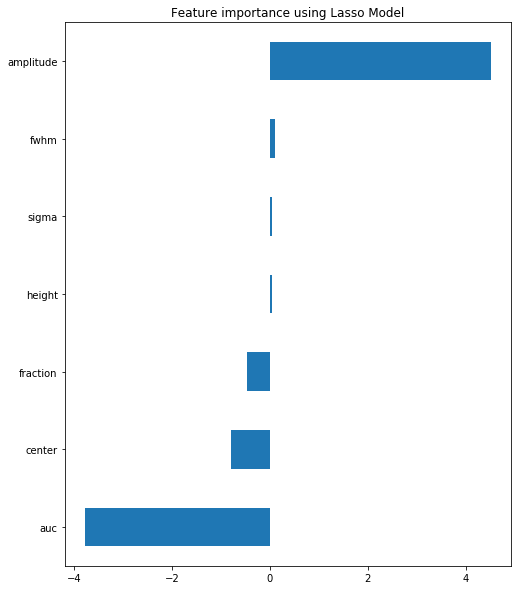

In [34]:
#LASSO 
#feature selection

# X_train_scaled  = preprocessing.normalize(X_train, norm='l2', axis=0, copy=True, return_norm=False)
# X_test_scaled  = preprocessing.normalize(X_test, norm='l2', axis=0, copy=True, return_norm=False)
# If normalized is needed
scaler = StandardScaler().fit(X_train)
X_train_normalized = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)
clf = linear_model.Lasso(alpha=0.004, tol=0.0001 ,max_iter=50000)
clf.fit(X_train_normalized,y_train)
coef = pd.Series(clf.coef_, index = X_train.columns)
print(coef)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# What makes sense is that center should be the only one to correlate to labels due to peakidentification
# L1 loss function points to center as the only solution

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  import sys
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to

Text(0.5, 1.0, 'error vs $\\lambda$')

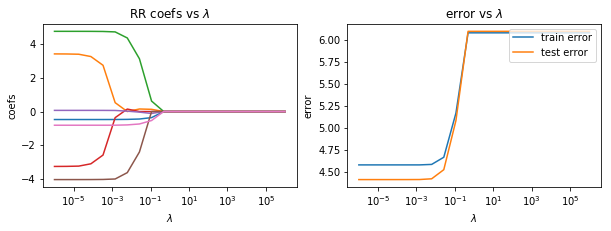

In [35]:
model=linear_model.Lasso()
# RR vs lambda (based on sklearn tutorial)
coefs = []
trainerror = []
testerror = []
scaler = StandardScaler().fit(X_train)
X_train_normalized = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)

Y = 8
X = 0
# do you know what is happening here? 
lambdas = np.logspace(-6,6,20) # SEACH THE RANGE OF THE LAMBDA SPACE

# loop over lambda values (strength of regularization)
for l in lambdas:
    model.set_params(alpha=l)
    model.fit(X_train_normalized,y_train)
    trainpred = model.predict(X_train_normalized)
    testpred = model.predict(X_test_normalized)
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))
plt.figure(figsize=(10,3))
plt.locator_params(nbins=5)
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('RR coefs vs $\lambda$')
#plt.xlim(1e-4,1e0)

plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.plot(lambdas,testerror,label='test error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
#plt.xlim(1e-4,1e0)
#plt.ylim(0,0.5)
plt.legend(loc=1)
plt.title('error vs $\lambda$')

# Ridge Feature Selection #Didnt eliminate anything 

fraction    -0.474888
sigma        0.081038
amplitude    4.765680
fwhm         0.081038
height       0.068972
auc         -4.043576
center      -0.813463
dtype: float64
Lasso picked 7 variables and eliminated the other 0 variables


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  """


Text(0.5, 1.0, 'Feature importance using Ridge Model')

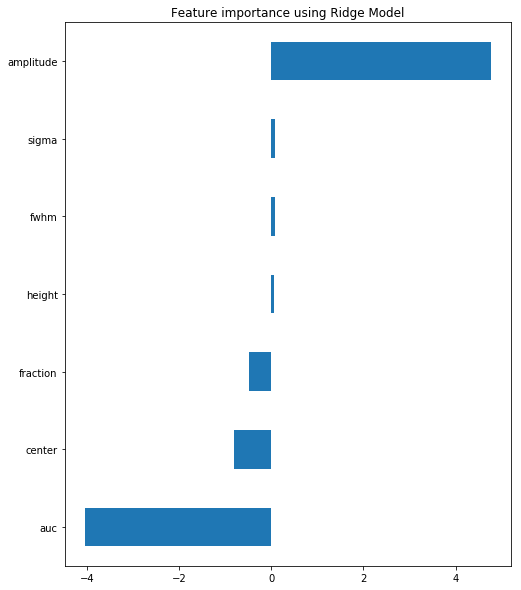

In [36]:
#Ridge
#feature selection
scaler = StandardScaler().fit(X_train)
X_train_normalized = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)
clf = linear_model.Ridge(alpha=0.004, tol=0.0001 ,max_iter=50000)
clf.fit(X_train_normalized,y_train)
coef = pd.Series(clf.coef_, index = X_train.columns)
print(coef)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")

## 2-2 Example of searching the $\alpha$ space in RR RIDGE

Text(0.5, 1.0, 'error vs $\\lambda$')

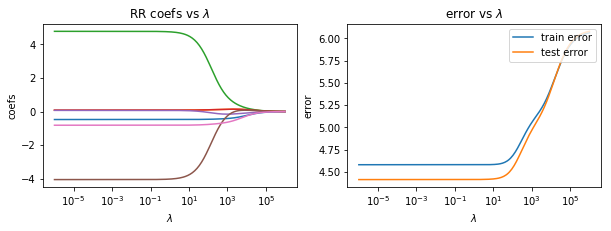

In [37]:
# RR vs lambda (based on sklearn tutorial)
coefs = []
trainerror = []
testerror = []

Y = 8
X = 0
# do you know what is happening here? 
lambdas = np.logspace(-6,6,200) # SEACH THE RANGE OF THE LAMBDA SPACE
model=Ridge()

# loop over lambda values (strength of regularization)
for l in lambdas:
    model.set_params(alpha=l)
    model.fit(X_train_normalized,y_train)
    model.fit(X_train_normalized,y_train)
    trainpred = model.predict(X_train_normalized)
    testpred = model.predict(X_test_normalized)
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))
# what is being plotted here? 
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('RR coefs vs $\lambda$')
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.plot(lambdas,testerror,label='test error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
plt.legend(loc=1)
plt.title('error vs $\lambda$')

# Neural network

In [38]:
inputs=['fraction','sigma','amplitude','fwhm','height','auc','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp=dat[inputs]
y_exp= dat['labelencoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [39]:
import scipy.stats as stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statistics
import matplotlib.pyplot as plt

In [40]:
import sys
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)  


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  


In [41]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, batch_size=10000,verbose=0, max_iter=200, validation_fraction=0.33,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

clf.predict(X_test)

print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))

# Pick hyper parameters change how fast your neaural network learns
# change the conversion of the network settings and its accuracy settings 
# The epochs limit  can be changed into a conditiional function where 
# This is sayting just run  150 epochs and stop
# THe neaural network can be inputed with certain data points for each epoch
# The history object returned by the fit call contains the information in a fitting run.

Training set score: 0.756771
Test set score: 0.757859


Iteration 1, loss = 1.98055737
Iteration 2, loss = 1.76611752
Iteration 3, loss = 1.61976286
Iteration 4, loss = 1.51101814
Iteration 5, loss = 1.42368117
Iteration 6, loss = 1.35085219
Iteration 7, loss = 1.28815492
Iteration 8, loss = 1.23210565
Iteration 9, loss = 1.18197856
Iteration 10, loss = 1.13636866
Iteration 11, loss = 1.09489542
Iteration 12, loss = 1.05676380
Iteration 13, loss = 1.02121843
Iteration 14, loss = 0.98782007
Iteration 15, loss = 0.95654519
Iteration 16, loss = 0.92760366
Iteration 17, loss = 0.90058640
Iteration 18, loss = 0.87544955
Iteration 19, loss = 0.85203241
Iteration 20, loss = 0.83037251
Iteration 21, loss = 0.81001847
Iteration 22, loss = 0.79104321
Iteration 23, loss = 0.77367638
Iteration 24, loss = 0.75708367
Iteration 25, loss = 0.74190579
Iteration 26, loss = 0.72756582
Iteration 27, loss = 0.71392656
Iteration 28, loss = 0.70144227
Iteration 29, loss = 0.68958239
Iteration 30, loss = 0.67853995
Iteration 31, loss = 0.66775996
Iteration 32, los

Iteration 253, loss = 0.24940575
Iteration 254, loss = 0.24897066
Iteration 255, loss = 0.24867903
Iteration 256, loss = 0.24808186
Iteration 257, loss = 0.24773787
Iteration 258, loss = 0.24685351
Iteration 259, loss = 0.24599042
Iteration 260, loss = 0.24609801
Iteration 261, loss = 0.24485763
Iteration 262, loss = 0.24460301
Iteration 263, loss = 0.24382872
Iteration 264, loss = 0.24331943
Iteration 265, loss = 0.24262019
Iteration 266, loss = 0.24227142
Iteration 267, loss = 0.24167516
Iteration 268, loss = 0.24127364
Iteration 269, loss = 0.24113761
Iteration 270, loss = 0.24014453
Iteration 271, loss = 0.23933718
Iteration 272, loss = 0.23871549
Iteration 273, loss = 0.23821355
Iteration 274, loss = 0.23792124
Iteration 275, loss = 0.23752316
Iteration 276, loss = 0.23671737
Iteration 277, loss = 0.23608420
Iteration 278, loss = 0.23554059
Iteration 279, loss = 0.23547080
Iteration 280, loss = 0.23472863
Iteration 281, loss = 0.23402397
Iteration 282, loss = 0.23384001
Iteration 

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


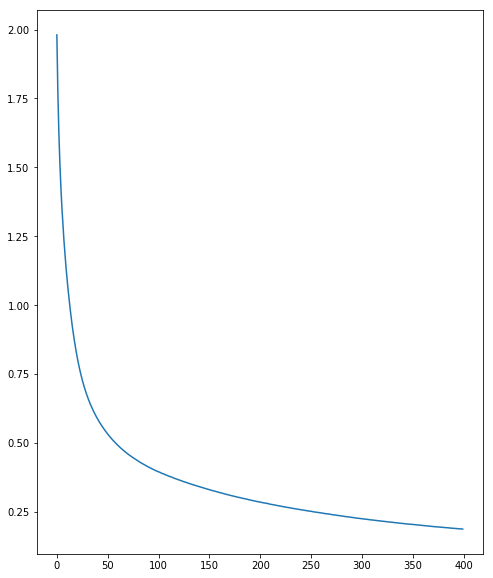

In [42]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1)

clf.fit(X_train, y_train)

clf.predict(X_test)

print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
loss_values = clf.loss_curve_
# print (loss_values)
plt.plot(loss_values)
plt.show()

Iteration 1, loss = 1.03752920
Iteration 2, loss = 0.53785220
Iteration 3, loss = 0.44602568
Iteration 4, loss = 0.39218513
Iteration 5, loss = 0.35532963
Iteration 6, loss = 0.32433028
Iteration 7, loss = 0.29820635
Iteration 8, loss = 0.27784134
Iteration 9, loss = 0.25935409
Iteration 10, loss = 0.24475569
Training set score: 0.922252
Test set score: 0.918862


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, 'Loss Cost')

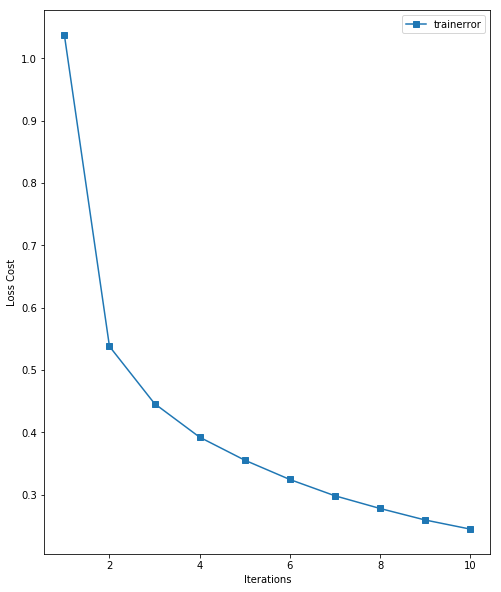

In [43]:
num = 10
clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=num, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

clf.fit(X_train, y_train)

ypred = clf.predict(X_test)

print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
loss_values = clf.loss_curve_
# print (loss_values)
# plt.plot(loss_values)
# plt.show()
lossrange = np.arange(1,num+1,1)
plt.plot(lossrange,loss_values,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss Cost')



C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

Training set score: 0.296123
Test set score: 0.300765


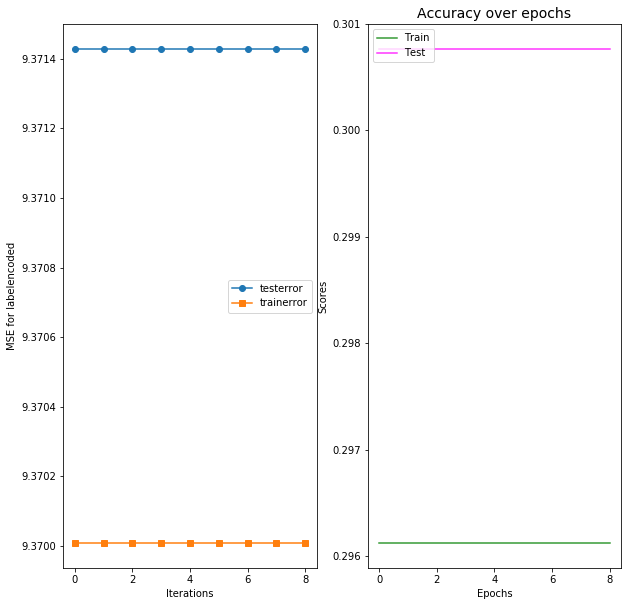

In [164]:
coefs = []
trainerror = []
testerror = []
loss_values = []
scores_train = []
scores_test = []
num = 10
lossrange = np.arange(1,num,1)
for i in lossrange:
    clf = MLPClassifier(solver='sgd',hidden_layer_sizes=(100,100), random_state=1, max_iter=i, warm_start=True)
    clf.fit(X_train,y_train)
    trainpred = clf.predict(X_train)
    testpred = clf.predict(X_test)
    coefs.append(clf.coefs_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))
    loss_values.append(clf.loss_curve_)
    # SCORE TRAIN
    scores_train.append(clf.score(X_train, y_train))

    # SCORE TEST
    scores_test.append(clf.score(X_test, y_test))
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.plot(trainerror,marker='o',label='testerror')
plt.plot(testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('MSE for labelencoded')
plt.subplot(122)
print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
plt.plot(scores_train, color='green', alpha=0.8, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.8, label='Test')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.legend(loc='upper left')
plt.show()

### Accuracy over epochs data

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (37) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (67) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (68) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (69) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

Training set score: 0.975890
Test set score: 0.969839


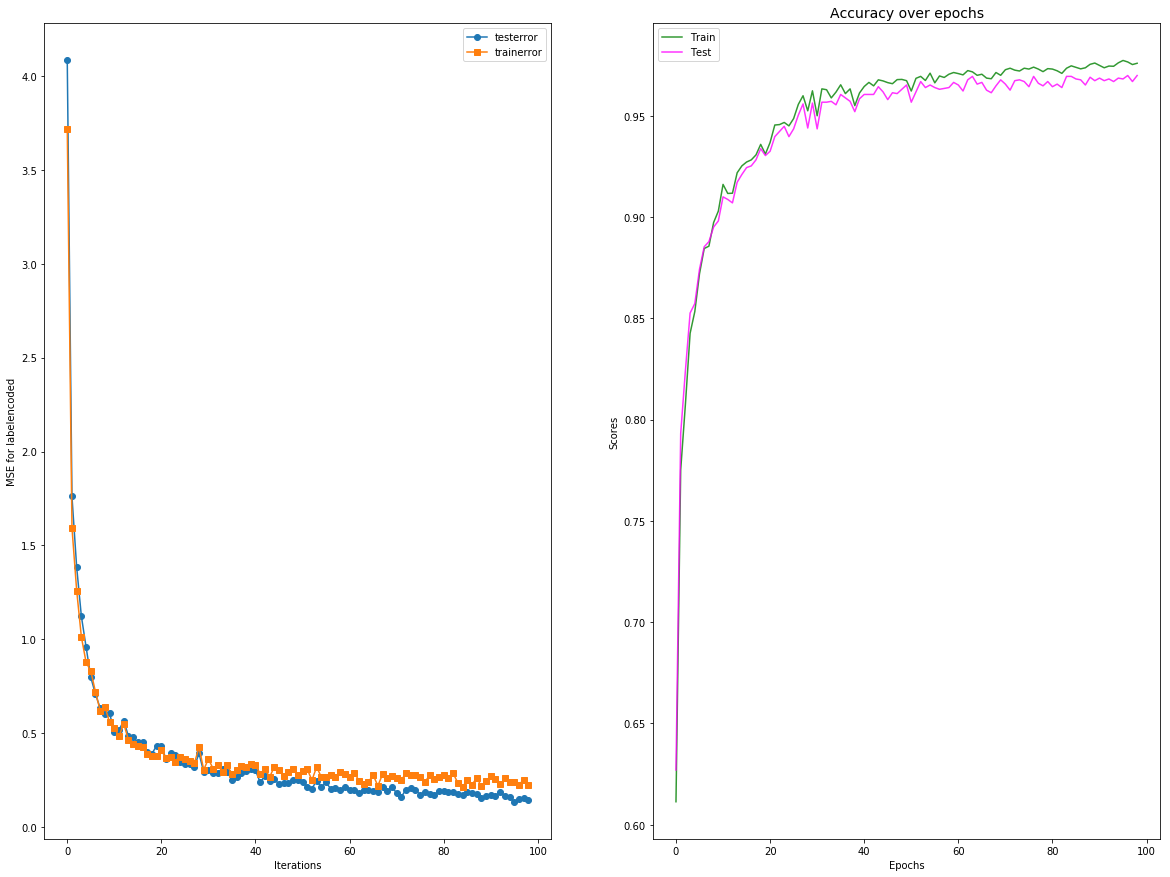

In [45]:
coefs = []
trainerror = []
testerror = []
loss_values = []
scores_train = []
scores_test = []
num = 100
lossrange = np.arange(1,num,1)
for i in lossrange:
    clf = MLPClassifier(hidden_layer_sizes=(100,100), random_state=1, max_iter=i, warm_start=True)
    clf.fit(X_train, y_train)
    trainpred = clf.predict(X_train)
    testpred = clf.predict(X_test)
    coefs.append(clf.coefs_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))
    loss_values.append(clf.loss_curve_)
    # SCORE TRAIN
    scores_train.append(clf.score(X_train, y_train))

    # SCORE TEST
    scores_test.append(clf.score(X_test, y_test))
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.plot(trainerror,marker='o',label='testerror')
plt.plot(testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('MSE for labelencoded')
plt.subplot(122)
print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
plt.plot(scores_train, color='green', alpha=0.8, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.8, label='Test')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.legend(loc='upper left')
plt.show()

# Cross Validation of NN

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
seed = 21899

In [47]:
# from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(max_iter=1)
# #Define a hyper-parameter space to search. (All the values that you want to try out.)

# parameter_space = {
#     'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }
# # Note: the max_iter=100 that you defined on the initializer is not in the grid. So, that number will be constant, while the ones in the grid will be searched.

# # Run the search:

# from sklearn.model_selection import GridSearchCV

# clf = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=3)
# clf.fit(X_train, y_train)
# # Note: the parameter n_jobs is to define how many CPU cores from your computer to use. The cv is the number of splits for cross-validation.

# # See the best results:

# # Best paramete set
# print('Best parameters found:\n', clf.best_params_)

# # All results
# means = clf.cv_results_['mean_test_score']
# stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
# # Now you can use the clf to make new predictions. For example, check the performance on your test set.

# y_true, y_pred = y_test , clf.predict(X_test)

# from sklearn.metrics import classification_report
# print('Results on the test set:')
# print(classification_report(y_true, y_pred))










In [48]:
[coef.shape for coef in clf.coefs_]

[(7, 100), (100, 100), (100, 8)]

# Support Vector Machines rbf

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap

In [119]:
inputs=['fraction','sigma','amplitude','fwhm','height','auc','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp=dat[inputs]
y_exp= dat['labelencoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [120]:
X_train_scaled  = preprocessing.normalize(X_train, norm='l2', axis=0, copy=True, return_norm=False)
X_test_scaled  = preprocessing.normalize(X_test, norm='l2', axis=0, copy=True, return_norm=False)
#Support Vector Machine 
#-->Chosen under the assumption that eventually more batteries will be added with highly dimensional features that 
# can not be seperated by simple linear or logistic regression models 

In [121]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train) 
trainpred=svclassifier.predict(X_train_scaled ) #predict train data 
testpred=svclassifier.predict(X_test_scaled )
print("Train error",mean_squared_error(y_train,trainpred))
print("Test error",mean_squared_error(y_test,testpred))
print("Training set score: %f" % svclassifier.score(X_train, y_train))
print("Test set score: %f" % svclassifier.score(X_test, y_test))
y_pred = svclassifier.predict(X_test)  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train error 14.000106213489113
Test error 13.988530161427358
Training set score: 0.999575
Test set score: 0.971963
[[440   2   0   0   0   0   0]
 [ 12 696   0   0   0   0   0]
 [ 16   0 184   0   0   0   0]
 [  0   0   0 104   0   0   0]
 [ 15   0   0   0 373   0   0]
 [  0   0   0   0   0 331   0]
 [ 21   0   0   0   0   0 160]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       442
           1       1.00      0.98      0.99       708
           2       1.00      0.92      0.96       200
           3       1.00      1.00      1.00       104
           5       1.00      0.96      0.98       388
           6       1.00      1.00      1.00       331
           7       1.00      0.88      0.94       181

   micro avg       0.97      0.97      0.97      2354
   macro avg       0.98      0.96      0.97      2354
weighted avg       0.98      0.97      0.97      2354

Accuracy: 0.9719626168224299


# KNN

In [122]:
inputs=['fraction','sigma','amplitude','fwhm','height','auc','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp=dat[inputs]
y_exp= dat['labelencoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [123]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline
# this is a new library you haven't seen before, what do you think it does? 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [124]:
KNNmodel = KNeighborsClassifier(n_neighbors=3) # initialize the model by choosing the number of neighbors (flexibility of model in this case)
# KNNmodel = KNeighborsClassifier(n_neighbors=1) minimum neighbord minimum predicted error
# remember the parabolic function of training vs. test set there is limit to the flexilibility vs. errors of the model
# Expected n_neighbors <= n_samples,  but n_samples = 15, n_neighbors = 20
# thus KNNmodel = KNeighborsClassifier(n_neighbors=15) is max

In [125]:
KNNmodel.fit(X_train, y_train) # feed the model some training data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [126]:
rate = KNNmodel.predict(X_train) == y_train # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Training Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

rate = KNNmodel.predict(X_test) == y_test
print('Testing Error Rate:', np.mean(rate))

Training Error Rate: 0.9992565055762082
Testing Error Rate: 0.9957519116397621


In [127]:
k_range = range(1,20)
# empty list to store scores
k_scores = []
trainerror = []
testerror = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    KNNmodel = KNeighborsClassifier(n_neighbors=k)
    KNNmodel.fit(X_train, y_train)
    trainerror.append(np.sqrt(mean_squared_error(y_train,KNNmodel.predict(X_train))))
    testerror.append(np.sqrt(mean_squared_error(y_test,KNNmodel.predict(X_test))))


In [128]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import svm

In [129]:
# inputs=['fraction','sigma','amplitude','height','center']
# X_train = cal[inputs]
# y_train = cal['labelencoded']
# X_test = dat[inputs]
# y_test = dat['labelencoded']

# KNN CROSS VALIDATION FROM https://www.ritchieng.com/machine-learning-cross-validation/ and lectures 

In [148]:
inputs=['fraction','sigma','amplitude','fwhm','height','auc','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp=dat[inputs]
y_exp= dat['labelencoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# k = 5 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.99915326 0.99745978 0.99915254 0.99915182 0.99829932 0.99829932
 0.99318569 0.99829642 0.99914821 0.99744463]


In [149]:
# use average accuracy as an estimate of out-of-sample accuracy
# numpy array has a method mean()
print(scores.mean())

0.9979591002615311


In [150]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 50)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The

[0.9985545602464665, 0.9977900429523526, 0.9978748605944221, 0.9977889592516446, 0.9979591002615311, 0.9973647243471591, 0.9971961706834944, 0.9967706375388696, 0.9966020107708029, 0.9964310048818328, 0.9960058329707774, 0.9960060497121683, 0.9956656239336799, 0.9956656239336799, 0.9953255581637164, 0.9952400192795524, 0.9953251981551914, 0.9953248369216219, 0.9952396580459831, 0.9952396580459831, 0.9950696615282748, 0.994984482652636, 0.9944744215900082, 0.9944744215900082, 0.9941345721915807, 0.9940492496789526, 0.9942193179542924, 0.994304135596362, 0.9932860303768489, 0.9930309268628594, 0.9923515168131555, 0.9920967745327353, 0.9920973509127962, 0.9919271380235518, 0.9913321136016322, 0.9911625501968508, 0.991077371321212, 0.991077371321212, 0.9905670209043727, 0.9909075915448946, 0.9907375950271863, 0.9913324747087989, 0.9911624066815878, 0.9914175820749351, 0.9909926271533995, 0.9909916175386855, 0.9907366588867292, 0.9903129287263994, 0.9904825651138566]


In [151]:
# in essence, this is basically running the k-fold cross-validation method 30 times because we want to run through K values from 1 to 30
# we should have 30 scores here
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 49
Max of list 0.9985545602464665


Text(0, 0.5, 'Cross-validated accuracy')

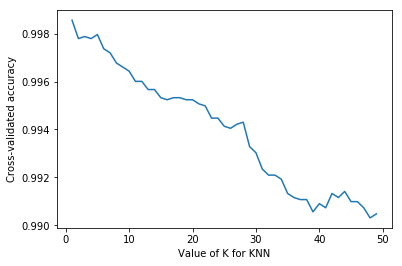

In [152]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [155]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
# Instead of saving 10 scores in object named score and calculating mean
# We're just calculating the mean directly on the results
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.9978748605944221


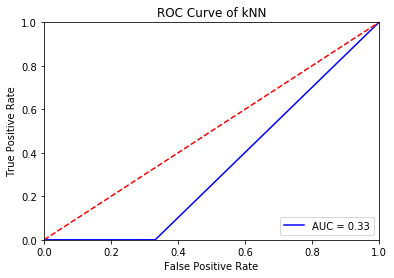

In [156]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_scores = knn.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores[:, 1], pos_label=2)
metrics.auc(fpr, tpr)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

# Decision Trees # specifically to see if below descriptors can find and predict Area under curve # Strings needed to be 

In [137]:
inputs=['fraction','sigma','amplitude','fwhm','height','auc','center']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['labelencoded'][:amt]
X_exp=dat[inputs]
y_exp= dat['labelencoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [138]:
from sklearn import linear_model
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn import tree

In [139]:
DT=tree.DecisionTreeRegressor(max_depth=3)
DT.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [140]:
import os
#conda install -c conda-forge pydotplus=2.0.2
# http://www.webgraphviz.com
import pydotplus 

In [141]:
with open("basic_tree.dot", 'w') as f:
    f = tree.export_graphviz(DT, out_file=f)

In [142]:
#http://www.webgraphviz.com
# os.unlink('basic_tree.dot')

dot_data = tree.export_graphviz(DT, out_file=None,feature_names=inputs)
graph = pydotplus.graph_from_dot_data(dot_data) 
#graph.write_pdf("basic_tree.pdf") 

In [143]:
os.environ["PATH"] += os.pathsep + 'C:/Users/koolk/Anaconda3/Library/bin/graphviz/'

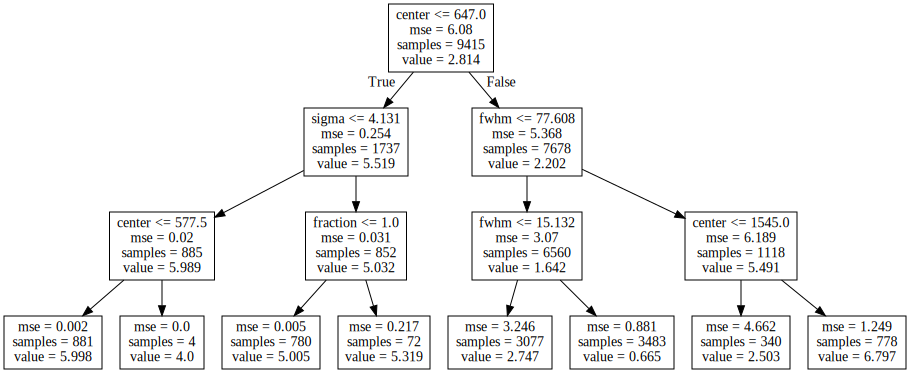

In [144]:
from IPython.display import SVG, display
display(SVG(graph.create_svg()))

In [163]:
model.fit(X_train,y_train)
rate = DT.predict(X_train) == y_train # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Training Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

rate = DT.predict(X_test) == y_test
print('Testing Error Rate:', np.mean(rate))

Training Error Rate: 0.00042485395645246946
Testing Error Rate: 0.0


6.796915167095116
Train error 1.660859251089592
Test error 1.7085800862013274


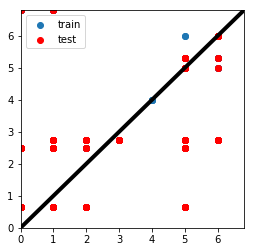

In [159]:
# make predictions on test and train set 
trainpred=DT.predict(X_train)
testpred=DT.predict(X_test)


maxlimit =testpred.max()
print(maxlimit)
#parity plot 
plt.figure(figsize=(4,4))
plt.xlim([0,maxlimit]);
plt.ylim([0,maxlimit]);
plt.scatter(y_train,trainpred, label ='train')
plt.scatter(y_test,testpred,color='r', label = 'test')
plt.plot([0,maxlimit],[0,maxlimit],lw=4,color='black')
plt.legend()
#calculate the test and train error
print("Train error",mean_squared_error(y_train,trainpred))
print("Test error",mean_squared_error(y_test,testpred))

In [160]:
trainerror = []
testerror = []

trees = np.arange(1,20,1)
#model=tree.DecisionTreeRegressor()

# loop over lambda values (strength of regularization)
for t in trees:
    model=tree.DecisionTreeRegressor(max_depth=t)
    model.fit(X_train,y_train)
    trainerror.append(mean_squared_error(y_test,model.predict(X_test)))
    testerror.append(mean_squared_error(y_test,model.predict(X_test)))

Text(0, 0.5, 'MSE for $auc$')

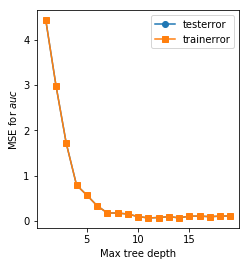

In [147]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(trees,trainerror,marker='o',label='testerror')
plt.plot(trees,testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('MSE for $auc$')
